<a href="https://colab.research.google.com/github/AnuThmsn/ML_Bioinformatics_Project/blob/main/ML_Bioinformatics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# These names are standard for the Breast Cancer Wisconsin dataset
column_names = [
    'id', 'diagnosis', 'mean_radius', 'mean_texture', 'mean_perimeter',
    'mean_area', 'mean_smoothness', 'mean_compactness', 'mean_concavity',
    'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
    'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness',
    'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry',
    'se_fractal_dimension', 'worst_radius', 'worst_texture',
    'worst_perimeter', 'worst_area', 'worst_smoothness',
    'worst_compactness', 'worst_concavity', 'worst_concave_points',
    'worst_symmetry', 'worst_fractal_dimension'
]

In [3]:
import pandas as pd



file_path = '/content/drive/My Drive/ML_Bioinformatics_Project/Data/wdbc.data'

# Use the 'names' parameter to assign the column names
df = pd.read_csv(file_path, header=None, names=column_names)

In [4]:
print(df.head())
print(df.info())
print(df.describe())

         id diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  worst_radius  worst_texture  worst_perimeter  worst_ar

In [5]:
df = df.drop('id', axis=1)


In [6]:
# Convert 'M' to 1 (Malignant) and 'B' to 0 (Benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# malignant refers to cancerous tissues and benign to non cancerous tissues
# Verify the changes
print(df['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


In [7]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for your plots
sns.set_style('whitegrid')


In [8]:
# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Get descriptive statistics for all numerical columns
print("\nDescriptive Statistics:")
print(df.describe().T)

First 5 rows of the DataFrame:
   diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.24


Diagnosis Class Distribution:
diagnosis
0    357
1    212
Name: count, dtype: int64


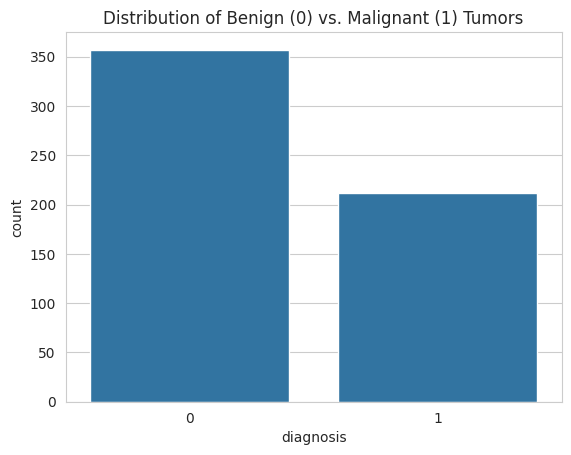

In [9]:
# Check the class distribution of the 'diagnosis' column
print("\nDiagnosis Class Distribution:")
print(df['diagnosis'].value_counts())

# Visualize the class distribution
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Benign (0) vs. Malignant (1) Tumors')
plt.show()

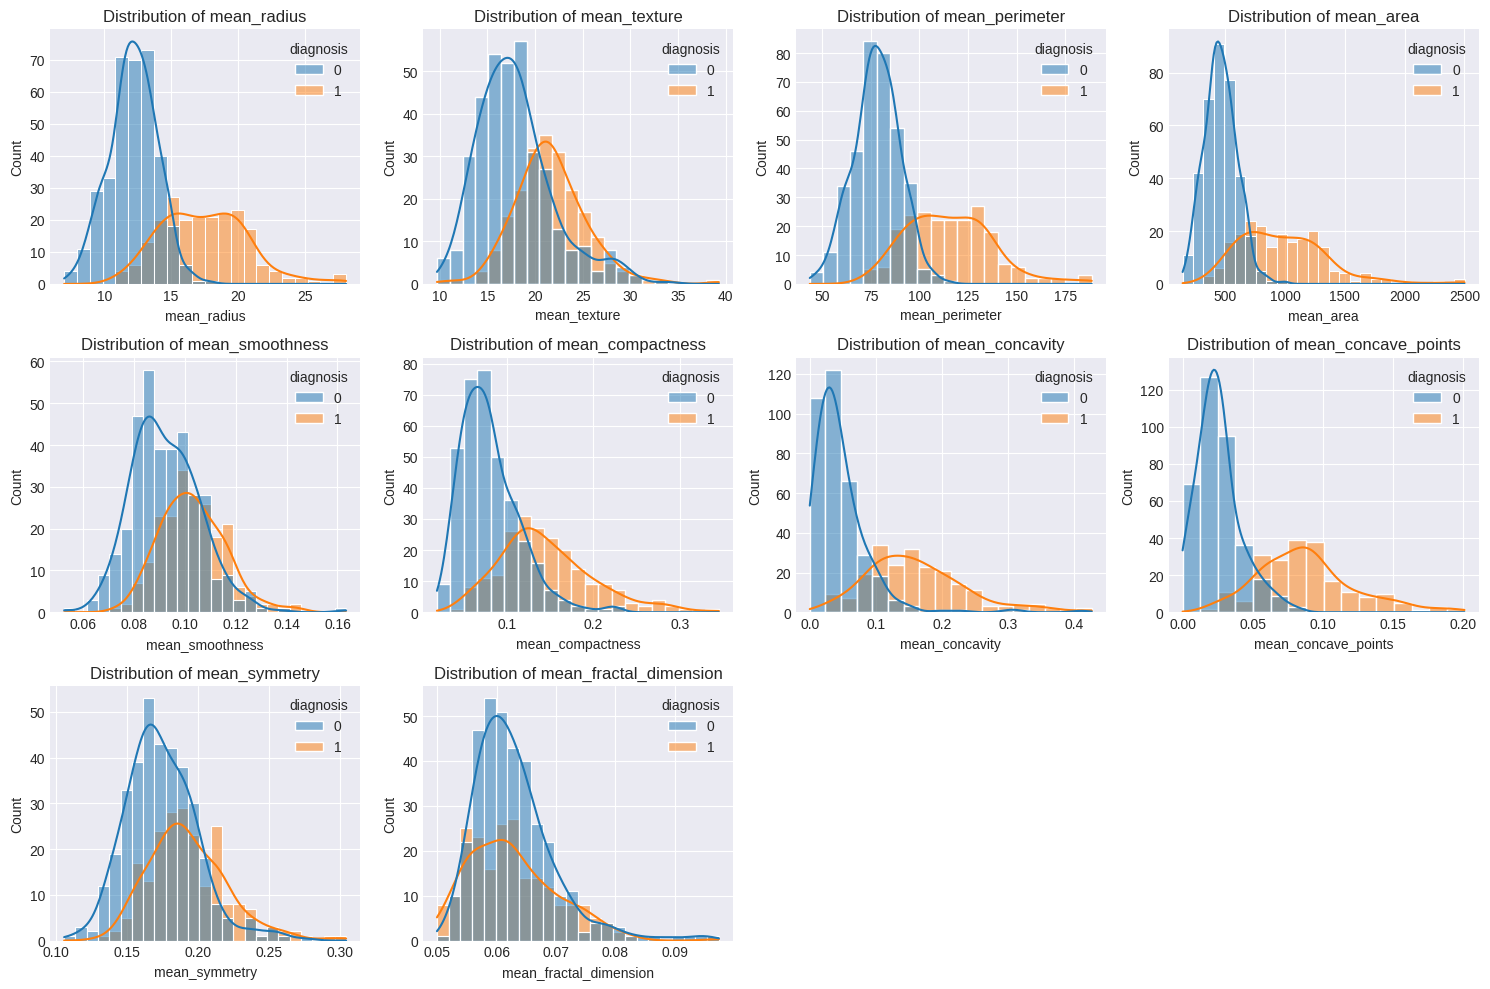

In [11]:
# Select the 'mean' features for plotting
mean_features = df.columns[1:11]

# Plot histograms for each 'mean' feature
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(15, 10))
for i, feature in enumerate(mean_features):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df, x=feature, hue='diagnosis', kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.show()

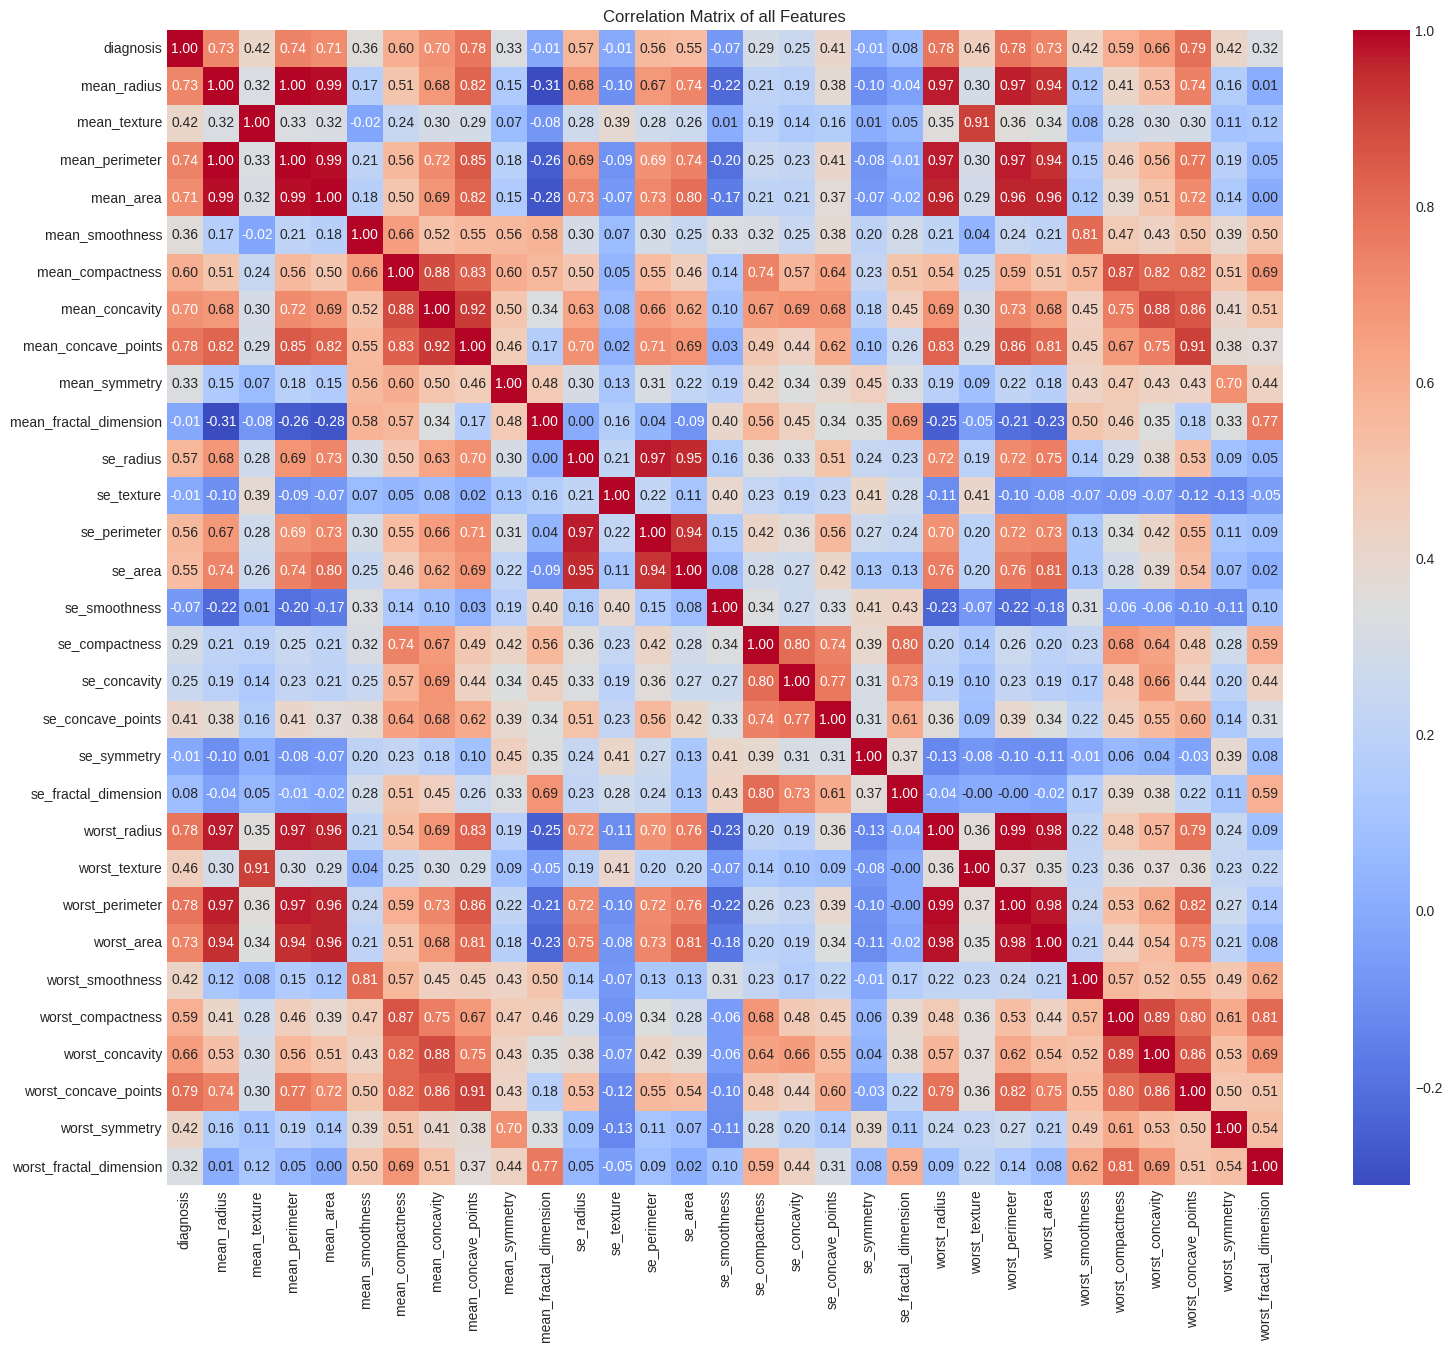

In [12]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of all Features')
plt.show()

In [13]:
# Import the necessary function
from sklearn.model_selection import train_test_split

X = df.drop('diagnosis', axis=1)


y = df['diagnosis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the new datasets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


In [14]:
# Import the StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# The scaler learns the mean and standard deviation from the training data
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the testing data
# DO NOT fit the scaler on the test data to avoid data leakage
X_test_scaled = scaler.transform(X_test)

# Print the scaled data to see the changes
print("\nSample of scaled X_train:")
print(X_train_scaled[:3])
print("\nSample of scaled X_test:")
print(X_test_scaled[:3])


Sample of scaled X_train:
[[ 5.18558727e-01  8.91825791e-01  4.24631702e-01  3.83925436e-01
  -9.74743706e-01 -6.89771505e-01 -6.88586446e-01 -3.98175254e-01
  -1.03915470e+00 -8.25056321e-01 -1.09317755e-01 -5.59755400e-02
  -2.10096206e-01 -1.59132582e-02 -1.00518399e+00 -9.11941990e-01
  -6.62815884e-01 -6.52561081e-01 -7.01889114e-01 -2.75393571e-01
   5.79797697e-01  1.31324246e+00  4.66908134e-01  4.45982711e-01
  -5.96154777e-01 -6.34722227e-01 -6.10227299e-01 -2.35743918e-01
   5.45663235e-02  2.18367276e-02]
 [-5.16364088e-01 -1.63971029e+00 -5.41348716e-01 -5.42961327e-01
   4.76219058e-01 -6.31833818e-01 -6.04281166e-01 -3.03074908e-01
   5.21543093e-01 -4.54522896e-01 -6.04377961e-01 -1.00104604e+00
  -5.85429002e-01 -4.93453793e-01  4.03212009e-01 -7.68173276e-01
  -4.79187222e-01  1.14508478e-01 -1.42950761e-01 -5.77397732e-01
  -5.82458953e-01 -1.69029101e+00 -6.11934288e-01 -5.87013537e-01
   2.73581959e-01 -8.14844486e-01 -7.12666415e-01 -3.23207881e-01
  -1.37576237e

In [15]:
# Import the classification models you want to test
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Create a dictionary of models to test
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Train each model using a for loop
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    print("Training complete.\n")

Training Logistic Regression...
Training complete.

Training Decision Tree...
Training complete.

Training Random Forest...
Training complete.

Training Support Vector Machine...
Training complete.

Training K-Nearest Neighbors...
Training complete.



In [16]:
# Import the necessary evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Create empty lists to store the results
results = []

print("Evaluating models on the test set:")
for name, model in models.items():
    # Make predictions on the scaled test data
    y_pred = model.predict(X_test_scaled)

    # Calculate the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the results
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    # Print a summary report for each model
    print(f"--- {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}\n")

# Create a DataFrame to easily compare the results
results_df = pd.DataFrame(results)
print("Comparison of Model Performance:")
print(results_df.sort_values(by='F1-Score', ascending=False))

Evaluating models on the test set:
--- Logistic Regression ---
Accuracy: 0.9649
Precision: 0.9750
Recall: 0.9286
F1-Score: 0.9512

--- Decision Tree ---
Accuracy: 0.9298
Precision: 0.9048
Recall: 0.9048
F1-Score: 0.9048

--- Random Forest ---
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1-Score: 0.9630

--- Support Vector Machine ---
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1-Score: 0.9630

--- K-Nearest Neighbors ---
Accuracy: 0.9561
Precision: 0.9744
Recall: 0.9048
F1-Score: 0.9383

Comparison of Model Performance:
                    Model  Accuracy  Precision    Recall  F1-Score
2           Random Forest  0.973684   1.000000  0.928571  0.962963
3  Support Vector Machine  0.973684   1.000000  0.928571  0.962963
0     Logistic Regression  0.964912   0.975000  0.928571  0.951220
4     K-Nearest Neighbors  0.956140   0.974359  0.904762  0.938272
1           Decision Tree  0.929825   0.904762  0.904762  0.904762


hypertuning for svm and random forest since they showed highest perfomace



In [17]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# --- Hyperparameter tuning for Support Vector Machine (SVM) ---

print("Starting Hyperparameter Tuning for SVM...")
# Define the parameter grid to search through
# 'C': controls the trade-off between a smooth decision boundary and correctly classifying training points.
# 'kernel': the function used to map the data into a higher-dimensional space.
# 'gamma': a parameter for the 'rbf' kernel that defines the influence of a single training example.
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01, 0.001]
}

# Create a GridSearchCV object
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='f1', verbose=1)

# Fit the grid search to the data
grid_search_svm.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best F1-Score for SVM:", grid_search_svm.best_score_)

# --- Hyperparameter tuning for Random Forest ---

print("\nStarting Hyperparameter Tuning for Random Forest...")
# Define the parameter grid for Random Forest
# 'n_estimators': number of trees in the forest.
# 'max_depth': maximum depth of the tree.
# 'min_samples_split': minimum number of samples required to split a node.
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1', verbose=1)

# Fit the grid search to the data
grid_search_rf.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best F1-Score for Random Forest:", grid_search_rf.best_score_)

Starting Hyperparameter Tuning for SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters for SVM: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best F1-Score for SVM: 0.9667008847166881

Starting Hyperparameter Tuning for Random Forest...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best F1-Score for Random Forest: 0.9500936113929968


In [18]:
# Select the best estimator from each grid search
best_svm_model = grid_search_svm.best_estimator_
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the best-tuned models on the test set
y_pred_svm = best_svm_model.predict(X_test_scaled)
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Calculate and print the F1-Score for each
from sklearn.metrics import f1_score

print("\nFinal Evaluation on Test Set:")
print("Tuned SVM F1-Score:", f1_score(y_test, y_pred_svm))
print("Tuned Random Forest F1-Score:", f1_score(y_test, y_pred_rf))


Final Evaluation on Test Set:
Tuned SVM F1-Score: 0.975609756097561
Tuned Random Forest F1-Score: 0.9629629629629629


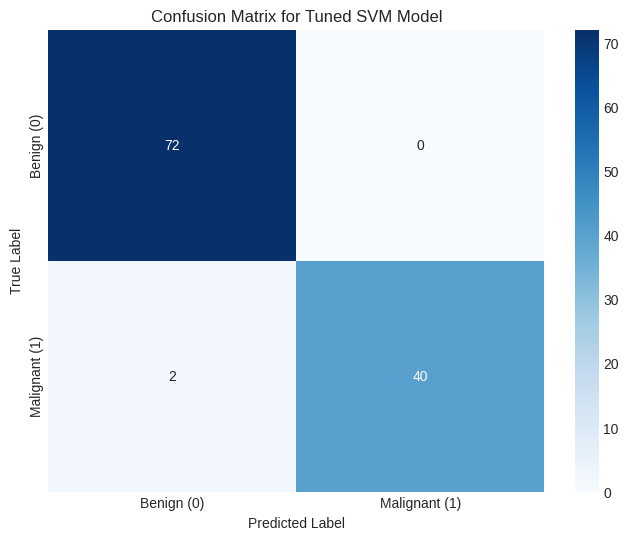

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# You have your final tuned SVM model from the grid search
best_svm_model = grid_search_svm.best_estimator_

# Get predictions on the test set
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign (0)', 'Malignant (1)'], yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Tuned SVM Model')
plt.show()
